# Questions et infos

Configuration de train_model() et predict_image() dans ce notebook

* Il faut prendre quoi comme valeur d'epsilon par defaut ?
* train_model() prend maintenant en input: X, y, label_encoder + config.all_variables
* predict_image() prend maintenant en input un np.array
* Je ne trouve pas un model > 90% d'accuracy
* Dans la DB, les images ont 1 ou 3 channels ? (greyscale/RGB)
* J'ai ajouté une fonction resize_images à implementer dans train_model() car:
    * Taille des images variables pour chaque user
* Verifier le ML car:
    * Nombre d'images variable en fonction des users
* Je n'ai pas utilisé les variables de **config** pour faire des fonctions plus propre. Elle pourront être récupéré plus tard juste avant l'appel des fonctions
* Ajout de show_logs car le GUI n'a pas besoin de print





In [1]:
import controller.ml_controller as ml
MODEL_SAVE_DIR = '../data/models/trained/'
LOG_DIR = '../data/models/logs/'
DB_PATH = r"..\data\database.db"

In [2]:
# Aucune des variables ici n'est utilisé. Les valeurs ont été implementées en input des fonctions
# --- Chemins et Noms ---
ANONY_IMAGES_PATH = 'data/reconstructed_pipeline'
MODEL_NAME = 'simple_cnn_lfw_anony_v1'
# --- Paramètres des Données et Prétraitement ---
COLOR_MODE = 'grayscale'
IMG_WIDTH, IMG_HEIGHT, CHANNELS = (64, 64, 1 if COLOR_MODE == 'grayscale' else 3)
# --- Paramètres de Division des Données ---
SPLIT_STRATEGY = 'stratified'
# -- Pour 'stratified' --
TEST_SPLIT_RATIO = 0.2
VALIDATION_SPLIT_RATIO = 0.15
# -- Pour 'fixed_per_subject' --
N_TRAIN_PER_SUBJECT = 16
RANDOM_STATE = 42
# ---    Paramètres du Modèle ---
MODEL_ARCHITECTURE = 'simple_cnn'
# -- Pour Transfer Learning (si MODEL_ARCHITECTURE commence par 'transfer_') --
TRANSFER_BASE_MODEL_NAME = 'MobileNetV2'
TRANSFER_FREEZE_BASE = True
# --- Paramètres d'Entraînement ---
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EARLY_STOPPING_PATIENCE = 10

### Data from folder (LFW dataset)

In [3]:
X, y, label_encoder = ml.data_loader.load_anonymized_images_flat(
    data_dir='data/reconstructed_pipeline',
    img_width=64,
    img_height=64,
    color_mode='grayscale'
)

Chargement des images depuis : data/reconstructed_pipeline
Format attendu : 64x64, mode: grayscale
Erreur: Le dossier spécifié n'existe pas : data/reconstructed_pipeline


### Data from database

In [4]:
# Get data from db
X, y, label_encoder = ml.get_and_prepare_data(DB_PATH)
input_shape = X[0].shape
print(input_shape)

Create db connection at: D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\data\database.db
(100, 100, 3)
(100, 100, 3)


Division des données : test_size=0.2, validation_size=0.15
Taille Test: 63 échantillons
Taille Entraînement: 203 échantillons
Taille Validation: 48 échantillons
Construction du modèle CNN simple avec input_shape=(100, 100, 3) et num_classes=29
Modèle CNN simple construit.



Epoch 1: val_accuracy improved from -inf to 0.04167, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 2: val_accuracy improved from 0.04167 to 0.12500, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 3: val_accuracy did not improve from 0.12500

Epoch 4: val_accuracy improved from 0.12500 to 0.16667, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 5: val_accuracy improved from 0.16667 to 0.18750, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 6: val_accuracy did not improve from 0.18750

Epoch 7: val_accuracy did not improve from 0.18750

Epoch 8: val_accuracy improved from 0.18750 to 0.25000, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 9: val_accuracy improved from 0.25000 to 0.27083, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 10: val_accuracy did not improve from 0.27083

Epoch 11: val_accuracy improved from 0.27083 to 0.35417, saving model to ../data/models/trained/simple_cnn_lfw_anony_v1.h5



Epoch 12: val_accuracy did not improve from 0.35417

Epoch 13: val_accuracy did not improve from 0.35417

Epoch 14: val_accuracy did not improve from 0.35417

Epoch 15: val_accuracy did not improve from 0.35417

Epoch 16: val_accuracy did not improve from 0.35417

Epoch 17: val_accuracy did not improve from 0.35417

Epoch 18: val_accuracy did not improve from 0.35417

Epoch 19: val_accuracy did not improve from 0.35417

Epoch 20: val_accuracy did not improve from 0.35417

Epoch 21: val_accuracy did not improve from 0.35417
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
LabelEncoder sauvegardé dans : ../data/models/trained/simple_cnn_lfw_anony_v1_label_encoder.joblib
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4633 - loss: 2.1682
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\myDocs\Apprentissage\Isep\Year_3\Brno-Privacy_Preserving_Face_Recognition_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

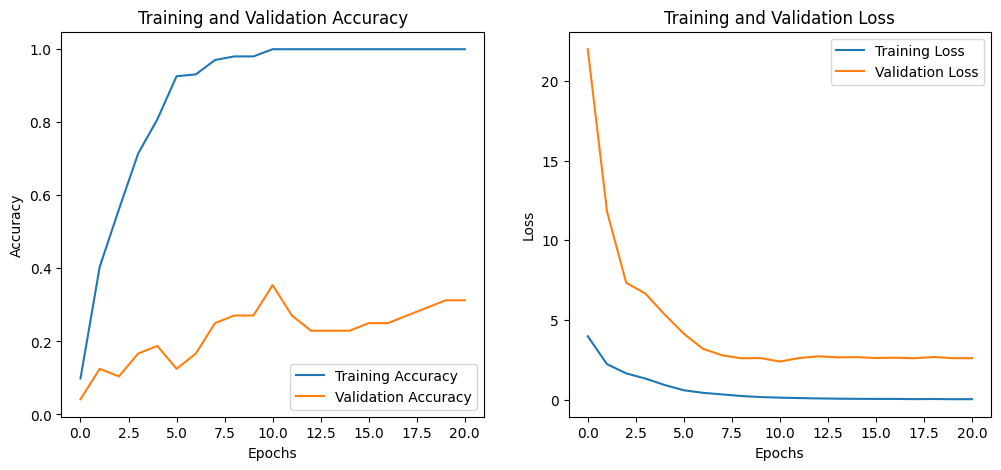

In [5]:
# Create the model
model = ml.train_model(X, y, label_encoder, input_shape=input_shape, model_save_dir=MODEL_SAVE_DIR, log_dir=LOG_DIR)

In [6]:
print(f"summary_text: {model['summary_text']}")
print(f"duration: {model['duration']}")
print(f"evaluation: {model['evaluation']}")
print(f"training_plot: {model['training_plot']}") # .show()

summary_text: Model: "simple_cnn"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_1 (BatchNormalization)      │ (None, 100, 100, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1_2 (BatchNormalization)      │ (None, 100, 100, 32)   │           128 │
├─────────────────────────────────┼───────

In [7]:
# Image to predict
index = 30

img_to_predict = X[index]
true_result = y[index]

# Make a prediction
prediction = ml.predict_image(img_to_predict, model_save_dir=MODEL_SAVE_DIR)

# Result
print(f"prediction: {prediction}")
print(f"true_result: {true_result}")
print(f"The model is correct: {prediction==true_result}")

LabelEncoder chargé depuis : ../data/models/trained/simple_cnn_lfw_anony_v1_label_encoder.joblib
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
prediction: 18
true_result: 2
The model is correct: False
